In [50]:
# Imports
import pandas as pd
import numpy as np
import datetime as dt
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from pathlib import Path
%matplotlib inline

In [51]:
# Bring in NBA Records CSV
team_stats_csv = Path('../1. Data_cleaning/Raw_Data/nba_team_stats.csv')
player_stats_csv = Path('../1. Data_cleaning/Cleansed_csv/height_salaries.csv')

# Read csv into a pandas Dataframe
team_stats = pd.read_csv(team_stats_csv)
player_stats = pd.read_csv(player_stats_csv)

# Organize dataframes for concatination
team_stats['Team'] = team_stats['Team'].replace(['LAC','LAL'],['LAL','LAC'])
team_stats.rename(columns={'Team':'Ticker'}, inplace=True)
team_stats.set_index('Ticker', inplace=True)
team_stats['Year'] = pd.DatetimeIndex(team_stats['Date']).year
team_stats.drop(columns=['Unnamed: 0', 'Game'], inplace=True)
team_stats['Margin'] = team_stats['TeamPoints'] - team_stats['OpponentPoints'] 
team_stats.head()

,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,...,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,Year,Margin
Ticker,,,,,,,,,,,,,,,,,,,,,
ATL,10/29/2014,Away,TOR,L,102,109,40,80,0.500,13,...,0.818,16,48,26,13,9,9,22,2014,-7
ATL,11/1/2014,Home,IND,W,102,92,35,69,0.507,7,...,0.857,11,44,25,5,5,18,26,2014,10
ATL,11/5/2014,Away,SAS,L,92,94,38,92,0.413,8,...,0.711,11,50,25,7,9,19,15,2014,-2
ATL,11/7/2014,Away,CHO,L,119,122,43,93,0.462,13,...,0.741,11,51,31,6,7,19,30,2014,-3
ATL,11/8/2014,Home,NYK,W,103,96,33,81,0.407,9,...,0.727,13,44,26,2,6,15,29,2014,7


In [52]:
# Organize dataframes for concatination
names = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Bobcats',
 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets',
 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
 'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers',
 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks',
 'Minnesota Timberwolves', 'New Orleans Hornets', 'New York Knicks',
 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers',
 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings',
 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']
tickers = ['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU',
 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOH', 'NYK', 'OKC', 'ORL', 'PHI',
 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
player_stats['Team'] = player_stats['Team'].replace(names,tickers)
player_stats.rename(columns={'Team':'Ticker'}, inplace=True)
player_stats.set_index('Ticker', inplace=True)
player_stats.head()

,Season Start,Season End,player_height,Salary,Salary w/ Inflation
Ticker,,,,,
ATL,2008,2009,2989.58,68168841.0,79797863.0
ATL,2009,2010,2829.56,65883642.0,78239128.0
ATL,2010,2011,2844.80,71469843.0,83988250.0
ATL,2011,2012,3025.14,73669912.0,83598545.0
ATL,2012,2013,3197.86,66710178.0,74461791.0


In [53]:
# Groupby for team data
team_stats_mean = team_stats.groupby(['Ticker','Year']).mean()
team_stats_std = team_stats.groupby(['Ticker','Year']).std()
team_stats_mean.head()

TeamPoints  OpponentPoints  FieldGoals  FieldGoalsAttempted  \
Ticker Year                                                                
ATL    2014  102.161290       97.419355   37.709677            80.612903   
       2015  102.470588       98.200000   38.200000            82.564706   
       2016  102.827160      100.691358   38.827160            85.259259   
       2017  103.941176      105.811765   38.188235            84.305882   
       2018  102.934783      109.456522   37.717391            86.195652   

             FieldGoals.  X3PointShots  X3PointShotsAttempted  X3PointShots.  \
Ticker Year                                                                    
ATL    2014     0.469806      9.290323              24.967742       0.372032   
       2015     0.463647      9.811765              26.741176       0.367247   
       2016     0.456148      9.765432              28.283951       0.345346   
       2017     0.453824      9.917647              27.141176       0.365188   
       2018     0.439348     11.369565              32.913043       0.348630   

             FreeThrows  FreeThrowsAttempted  ...  Opp.FreeThrowsAttempted  \
Ticker Year                                   ...                            
ATL    2014   17.451613            22.548387  ...                20.774194   
       2015   16.258824            20.647059  ...                20.152941   
       2016   15.407407            20.604938  ...                21.691358   
       2017   17.647059            23.552941  ...                20.447059   
       2018   16.130435            20.456522  ...                20.739130   

             Opp.FreeThrows.  Opp.OffRebounds  Opp.TotalRebounds  Opp.Assists  \
Ticker Year                                                                     
ATL    2014         0.734935        11.225806          43.096774    24.225806   
       2015         0.776471        11.494118          44.423529    22.800000   
       2016         0.755494        11.172840          45.592593    22.061728   
       2017         0.779282        10.964706          44.188235    24.694118   
       2018         0.784065         9.717391          44.673913    26.500000   

             Opp.Steals  Opp.Blocks  Opp.Turnovers  Opp.TotalFouls    Margin  
Ticker Year                                                                   
ATL    2014    7.354839    4.709677      14.967742       21.354839  4.741935  
       2015    7.800000    4.976471      15.835294       18.741176  4.270588  
       2016    9.000000    5.098765      15.061728       19.024691  2.135802  
       2017    8.470588    5.247059      15.023529       21.552941 -1.870588  
       2018    9.086957    5.739130      13.717391       19.826087 -6.521739  

[5 rows x 35 columns]

In [54]:
# Groupby for player data
player_stats_mean = player_stats.groupby(['Ticker','Season End']).mean()
player_stats_mean.head()

Season Start  player_height      Salary  \
Ticker Season End                                            
ATL    2009                2008        2989.58  68168841.0   
       2010                2009        2829.56  65883642.0   
       2011                2010        2844.80  71469843.0   
       2012                2011        3025.14  73669912.0   
       2013                2012        3197.86  66710178.0   

                   Salary w/ Inflation  
Ticker Season End                       
ATL    2009                 79797863.0  
       2010                 78239128.0  
       2011                 83988250.0  
       2012                 83598545.0  
       2013                 74461791.0

In [55]:
# Create correlation dataframe, bringing together team stats and player stats
correl_df = pd.concat([team_stats_mean, player_stats_mean], axis='columns', join='inner')
correl_df.head()

TeamPoints  OpponentPoints  FieldGoals  FieldGoalsAttempted  \
ATL 2014  102.161290       97.419355   37.709677            80.612903   
    2015  102.470588       98.200000   38.200000            82.564706   
    2016  102.827160      100.691358   38.827160            85.259259   
    2017  103.941176      105.811765   38.188235            84.305882   
    2018  102.934783      109.456522   37.717391            86.195652   

          FieldGoals.  X3PointShots  X3PointShotsAttempted  X3PointShots.  \
ATL 2014     0.469806      9.290323              24.967742       0.372032   
    2015     0.463647      9.811765              26.741176       0.367247   
    2016     0.456148      9.765432              28.283951       0.345346   
    2017     0.453824      9.917647              27.141176       0.365188   
    2018     0.439348     11.369565              32.913043       0.348630   

          FreeThrows  FreeThrowsAttempted  ...  Opp.Assists  Opp.Steals  \
ATL 2014   17.451613            22.548387  ...    24.225806    7.354839   
    2015   16.258824            20.647059  ...    22.800000    7.800000   
    2016   15.407407            20.604938  ...    22.061728    9.000000   
    2017   17.647059            23.552941  ...    24.694118    8.470588   
    2018   16.130435            20.456522  ...    26.500000    9.086957   

          Opp.Blocks  Opp.Turnovers  Opp.TotalFouls    Margin  Season Start  \
ATL 2014    4.709677      14.967742       21.354839  4.741935          2013   
    2015    4.976471      15.835294       18.741176  4.270588          2014   
    2016    5.098765      15.061728       19.024691  2.135802          2015   
    2017    5.247059      15.023529       21.552941 -1.870588          2016   
    2018    5.739130      13.717391       19.826087 -6.521739          2017   

          player_height      Salary  Salary w/ Inflation  
ATL 2014        3208.02  58998677.0           64718790.0  
    2015        3009.90  58320278.0           62675759.0  
    2016        3020.06  71661760.0           76918414.0  
    2017        3609.34  96315163.0          102359377.0  
    2018        3794.76  99992696.0          104559718.0  

[5 rows x 39 columns]

<AxesSubplot:>

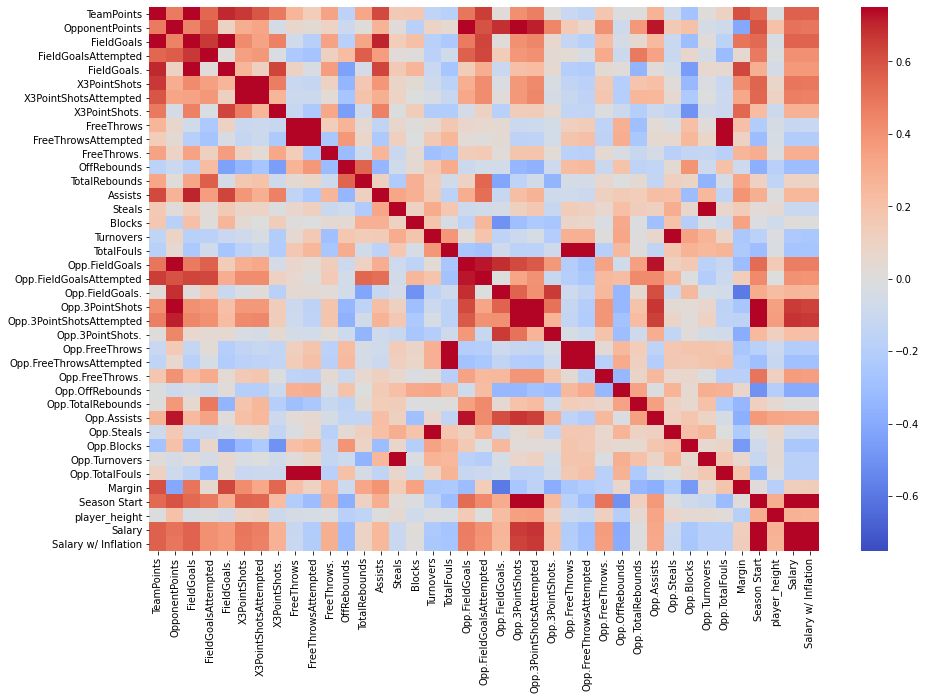

In [56]:
# Create correlation heatmap using seaborn 
correl_heat_map = correl_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(
    correl_heat_map, 
    vmin=-.75, 
    vmax=.75, 
    cmap="coolwarm")


In [57]:
# Create scatter plot using hvplot to identify correlation between team salaries and player height
correl_scatter = correl_df.hvplot.scatter(
    title = 'Team salaries vs. height (and avg. winning margin)',
    x='player_height',
    xlabel='Team height (inches)',
    y='Salary w/ Inflation',
    yformatter= '%.0f',
    ylabel='Team salary ($, inflation adjusted)',
    s='TeamPoints',
    scale=2,
    color='Margin',
    cmap='coolwarm',
    clabel = 'Avg winning(/loosing) margin',
    alpha = 0.9,
    # groupby='Year', 
    height=500, 
    width=750)
correl_scatter

:Scatter   [player_height]   (Salary w/ Inflation,Margin,TeamPoints)

In [58]:
# Create scatter plot using hvplot to identify correlation between team average winning margin, team salaries and player height
correl_scatter_2 = correl_df.hvplot.scatter(
    title = 'Avg winning margin vs. salaries (and team height)',
    x='Salary w/ Inflation',
    xlabel='Team Salary ($, inf. adj.)',
    xformatter= '%.0f',
    y='Margin',
    yformatter= '%.0f',
    ylabel='Average winning(/loosing) margin (pts)',
    s='TeamPoints',
    scale=2,
    color='player_height',
    cmap='coolwarm',
    clabel = 'Agg. team height (in)',
    alpha = 0.9,
    # groupby='Year', 
    height=500, 
    width=600)
correl_scatter_2

:Scatter   [Salary w/ Inflation]   (Margin,player_height,TeamPoints)

In [59]:
# Calculate league average (margin should be zero)
league_mean = round(team_stats_mean.mean(),2)
league_mean.head()

TeamPoints             103.56
OpponentPoints         103.57
FieldGoals              38.60
FieldGoalsAttempted     84.85
FieldGoals.              0.46
dtype: float64

In [60]:
# Calculate sharpe ratios using mean and stdev winning margins accross seasons
team_sharpe = round ( ( team_stats_mean - league_mean ) / team_stats_std, 2 )
team_sharpe_group = team_sharpe.groupby(['Ticker']).mean()
team_sharpe_group.sort_values(by='Margin', ascending=False, inplace=True)
team_sharpe_group.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,Margin
Ticker,,,,,,,,,,,,,,,,,,,,,
GSW,7.400000e-01,0.004,0.754,0.206,0.566,0.662,0.636,0.460,-0.092,-0.208,...,0.102,-0.046,0.306,0.034,-0.060,0.294,-0.490,0.170,-0.274,0.678
SAS,-1.387779e-18,-0.574,0.140,-0.124,0.156,-0.306,-0.686,0.168,-0.096,-0.206,...,-0.326,0.056,-0.228,-0.252,-0.318,-0.050,-0.336,0.040,-0.078,0.468
TOR,3.140000e-01,-0.178,0.104,-0.034,0.060,0.190,0.296,0.114,0.288,0.196,...,0.086,-0.050,0.004,-0.236,-0.100,-0.420,0.086,-0.016,0.136,0.468
HOU,4.280000e-01,-0.002,-0.122,-0.080,-0.156,1.102,1.706,0.052,0.328,0.418,...,-0.064,-0.004,0.080,-0.026,0.040,0.180,0.020,0.278,0.184,0.396
LAL,3.660000e-01,0.036,0.222,-0.196,0.282,0.234,0.232,0.180,0.214,0.346,...,0.190,-0.014,0.090,0.028,0.158,-0.156,-0.524,-0.014,0.402,0.274


In [61]:
# Concatinate with player stats over the period
player_sharpe_group = player_stats.groupby(['Ticker']).mean()
master_sharpe_df = pd.concat([team_sharpe_group, player_sharpe_group], axis='columns', join='inner')
master_sharpe_df.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,...,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,Margin,Season Start,Season End,player_height,Salary,Salary w/ Inflation
Ticker,,,,,,,,,,,,,,,,,,,,,
GSW,7.400000e-01,0.004,0.754,0.206,0.566,0.662,0.636,0.460,-0.092,-0.208,...,0.294,-0.490,0.170,-0.274,0.678,2012.5,2013.5,3129.382,81177684.8,89601170.0
SAS,-1.387779e-18,-0.574,0.140,-0.124,0.156,-0.306,-0.686,0.168,-0.096,-0.206,...,-0.050,-0.336,0.040,-0.078,0.468,2012.5,2013.5,3297.970,80882305.1,89564778.3
TOR,3.140000e-01,-0.178,0.104,-0.034,0.060,0.190,0.296,0.114,0.288,0.196,...,-0.420,0.086,-0.016,0.136,0.468,2012.5,2013.5,3198.380,78003337.6,86278361.9
HOU,4.280000e-01,-0.002,-0.122,-0.080,-0.156,1.102,1.706,0.052,0.328,0.418,...,0.180,0.020,0.278,0.184,0.396,2012.5,2013.5,3152.970,75282128.3,83316698.6
LAL,3.660000e-01,0.036,0.222,-0.196,0.282,0.234,0.232,0.180,0.214,0.346,...,-0.156,-0.524,-0.014,0.402,0.274,2012.5,2013.5,3244.596,87502133.4,97433931.8


In [62]:
# Utilize sharpe ratios to identify successful teams by winning margin compared to team salary (inflation adjusted)
team_sharpe_bar = master_sharpe_df.hvplot.bar(
    title = 'Sharpe ratios (on winning margin per game)',
    x='Ticker', 
    y='Margin',
    ylabel='Sharpe Ratio',
    c='Salary w/ Inflation',
    colorbar=True,
    clabel= 'Team salary (infl. adj.)',
    cmap='coolwarm', 
    rot=90,
    height=500, 
    width=600)
team_sharpe_bar

:Bars   [Ticker]   (Margin,Salary w/ Inflation)

In [63]:
# Mapping Team Salaries

In [24]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
from pathlib import Path

from opencage.geocoder import OpenCageGeocode
%matplotlib inline

In [64]:
# Load .env enviroment variables
load_dotenv()

# Set GeoCode API key
geocoder_key = os.getenv('OPEN_CAGE_API')
type(geocoder_key)

# Feed the API key into the imported OpenCageGeocode
geocoder = OpenCageGeocode(geocoder_key)

In [65]:
# Bring in the Area csv file
arena_csv = Path('../1. Data_Cleaning/Cleansed_csv/arena_location.csv')
# Read csv into a pandas Dataframe
arena = pd.read_csv(arena_csv)
arena = arena[["Team Name","Arena Location","lat","long"]]
arena

,Team Name,Arena Location,lat,long
0,Atlanta Hawks,"Atlanta, Georgia",33.748992,-84.390264
1,Boston Celtics,"Boston, Massachusetts",42.360253,-71.058291
2,Brooklyn Nets,"Brooklyn, New York",40.650102,-73.949583
3,Charlotte Hornets,"Charlotte, North Carolina",35.227209,-80.843083
4,Chicago Bulls,"Chicago, Illinois",41.875562,-87.624421
5,Cleveland Cavaliers,"Cleveland, Ohio",41.505161,-81.693445
6,Dallas Mavericks,"Dallas, Texas",32.776272,-96.796856
7,Denver Nuggets,"Denver, Colorado",39.739236,-104.984862
8,Detroit Pistons,"Detroit, Michigan",42.331551,-83.046640
9,Golden State Warriors,"San Francisco, California",37.779026,-122.419906


In [67]:
# Bring in salary average csv file
salary_csv = Path('../1. Data_Cleaning/Cleansed_csv/salary_avg.csv')
# Read csv into a pandas Dataframe
salary = pd.read_csv(salary_csv)
salary

,Team,Salary w/ Inflation
0,Atlanta Hawks,81131763.5
1,Boston Celtics,91050095.7
2,Brooklyn Nets,86496264.2
3,Charlotte Bobcats,81672887.6
4,Chicago Bulls,82796444.4
5,Cleveland Cavaliers,96250231.9
6,Dallas Mavericks,93516389.1
7,Denver Nuggets,80095618.7
8,Detroit Pistons,85159538.0
9,Golden State Warriors,89601170.0


In [68]:
#Concat data in preparation for mapping
arena_salaries = pd.concat([arena, salary], axis=1, sort=True)
arena_salaries = arena_salaries.drop(columns=['Team'])
arena_salaries

,Team Name,Arena Location,lat,long,Salary w/ Inflation
0,Atlanta Hawks,"Atlanta, Georgia",33.748992,-84.390264,81131763.5
1,Boston Celtics,"Boston, Massachusetts",42.360253,-71.058291,91050095.7
2,Brooklyn Nets,"Brooklyn, New York",40.650102,-73.949583,86496264.2
3,Charlotte Hornets,"Charlotte, North Carolina",35.227209,-80.843083,81672887.6
4,Chicago Bulls,"Chicago, Illinois",41.875562,-87.624421,82796444.4
5,Cleveland Cavaliers,"Cleveland, Ohio",41.505161,-81.693445,96250231.9
6,Dallas Mavericks,"Dallas, Texas",32.776272,-96.796856,93516389.1
7,Denver Nuggets,"Denver, Colorado",39.739236,-104.984862,80095618.7
8,Detroit Pistons,"Detroit, Michigan",42.331551,-83.046640,85159538.0
9,Golden State Warriors,"San Francisco, California",37.779026,-122.419906,89601170.0


In [69]:
#Create Base Map using folium library
import folium

map = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles="Stamen Terrain")
map

In [71]:
# Use data to map salaries by team acording to the arena locations
for idx in arena_salaries.index:
    row = arena_salaries.loc[idx]
    lat, long = row.lat, row.long
    folium.CircleMarker(
        location=[lat, long],
        clustered_marker = False,
        radius=arena_salaries.iloc[idx]['Salary w/ Inflation']/10000000,
        draggable = True,
        color="blue",
        popup = str(row["Team Name"]) + ", " + str(row["Salary w/ Inflation"]),
        tooltip = row["Arena Location"],
        fill_color="red"
        ).add_to(map)
map

# Panel Visualization

Tabs
    [0] HoloViews(Scatter, name='Team salaries v...)
    [1] HoloViews(Scatter, name='Avg winning m...)
    [2] HoloViews(Bars, name='Sharpe ratios (...)
    [3] Folium(Map, name='Mapping Salaries')
    [4] Str(AxesSubplot, name='Heat Map')

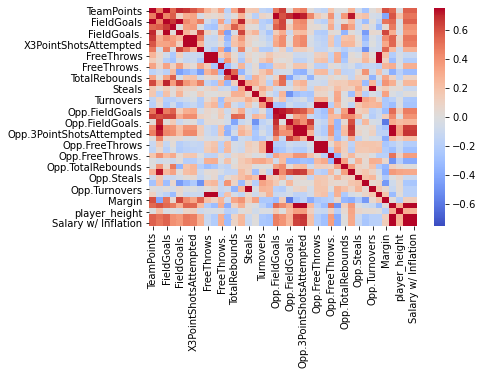

In [72]:
# Create a dashboard with the previous images
import panel as pn
dashboard = pn.Tabs(
    ("Team salaries vs. height (and avg. winning margin)", correl_scatter),
    ("Avg winning margin vs. salaries (and team height)", correl_scatter_2),
    ("Sharpe ratios (on winning margin per game)", team_sharpe_bar),
    ("Mapping Salaries", map), 
    ("Heat Map",sns.heatmap(
    correl_heat_map, 
    vmin=-.75, 
    vmax=.75, 
    cmap="coolwarm"))
)
dashboard

## Team Simulation using San Antonio Spurs (good winning margin, middle salary) and LA Lakers (slightly lower winnning margin, high salary)

In [73]:
# Bring in NBA game stats csv contains NBA team data from 2014 to 2018
nba_stats_csv = Path('../1. Data_Cleaning/Raw_Data/nba_team_stats.csv')

# Read csv into a pandas Dataframe
game_stats = pd.read_csv(nba_stats_csv)
game_stats.tail()


,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
9835,78119,WAS,78,4/3/2018,Away,HOU,L,104,120,38,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,4/5/2018,Away,CLE,L,115,119,47,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,4/6/2018,Home,ATL,L,97,103,35,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,4/10/2018,Home,BOS,W,113,101,41,...,22,27,0.815,13,44,22,14,1,16,18
9839,82119,WAS,82,4/11/2018,Away,ORL,L,92,101,33,...,22,27,0.815,6,42,20,6,7,16,27


In [74]:
# Generate list of teams
teams_filtered = game_stats.Team
teams_filtered = teams_filtered.drop_duplicates()
print(teams_filtered)

0       ATL
82      BOS
164     BRK
246     CHO
328     CHI
410     CLE
492     DAL
574     DEN
656     DET
738     GSW
820     HOU
902     IND
984     LAC
1066    LAL
1148    MEM
1230    MIA
1312    MIL
1394    MIN
1476    NOP
1558    NYK
1640    OKC
1722    ORL
1804    PHI
1886    PHO
1968    POR
2050    SAC
2132    SAS
2214    TOR
2296    UTA
2378    WAS
Name: Team, dtype: object


In [75]:
# Set Variables, user selects 2 teams from list above - plugging in "SAS" and "LAL"
team_1 = 'SAS'
team_2 = 'LAL'

In [76]:
# Create dataframes for two teams selected
# Team 1 dataframe
t1_df = game_stats[game_stats.Team == team_1]
#t1_df.head()

# Team 2 dataframe
t2_df = game_stats[game_stats.Team == team_2]
#t2_df.head()

<AxesSubplot:>

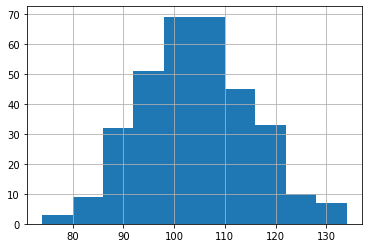

In [77]:
# Create histogram to look at points scored by Team 1 to look for normal distribution
t1_df.TeamPoints.hist()

<AxesSubplot:>

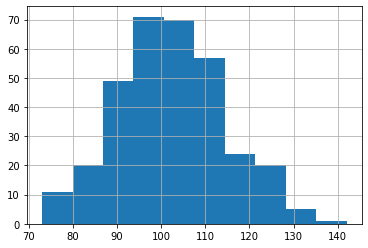

In [78]:
# Create histogram to look at points scored by Team 2 to look for normal distribution
t2_df.TeamPoints.hist()

<AxesSubplot:>

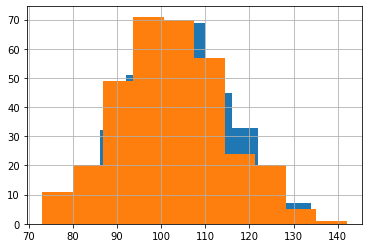

In [79]:
# Overlay points scored histograms for easier comparison
t1_df.TeamPoints.hist()
t2_df.TeamPoints.hist()

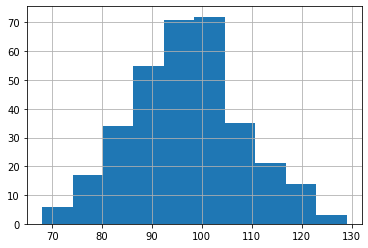

In [80]:
# Create histogram to look at points allowed by team 1
team_1_opponent = t1_df.OpponentPoints.hist()

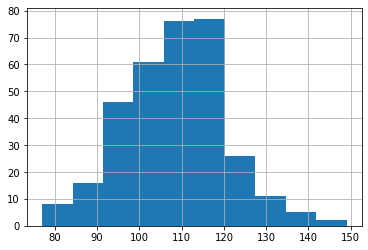

In [81]:
# Create histogram to look at points allowed by team 2
team_2_opponent = t2_df.OpponentPoints.hist()

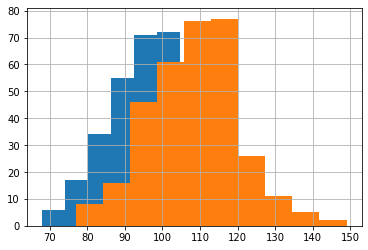

In [82]:
# Overlay histograms to look at points allowed by each team
points = t1_df.OpponentPoints.hist()
points_1 = t2_df.OpponentPoints.hist()

In [83]:
# Calculate mean and standard deviation for team 1 - to be used in simulated games
t1_mean_pts = t1_df.TeamPoints.mean()
t1_std_pts = t1_df.TeamPoints.std()
t1_mean_opp_pts = t1_df.OpponentPoints.mean()
t1_std_opp_pts = t1_df.OpponentPoints.std()
print("Team 1 Points Mean ", t1_mean_pts)
print("Team 1 Points SD ", t1_std_pts)
print("Team 1 Opponent Points Mean ", t1_mean_opp_pts)
print("Team 1 Opponent Points SD ", t1_std_opp_pts)

Team 1 Points Mean  103.6951219512195
Team 1 Points SD  10.945166667510273
Team 1 Opponent Points Mean  96.96646341463415
Team 1 Opponent Points SD  11.011063535191658


In [84]:
# Calculate mean and standard deviation for team 2
t2_mean_pts = t2_df.TeamPoints.mean()
t2_std_pts = t2_df.TeamPoints.std()
t2_mean_opp_pts = t2_df.OpponentPoints.mean()
t2_std_opp_pts = t2_df.OpponentPoints.std()
print("Team 2 Points Mean ", t2_mean_pts)
print("Team 2 Points SD ", t2_std_pts)
print("Team 2 Opponent Points Mean ", t2_mean_opp_pts)
print("Team 2 Opponent Points SD ", t2_std_opp_pts)

Team 2 Points Mean  102.10975609756098
Team 2 Points SD  12.398092087176295
Team 2 Opponent Points Mean  108.3170731707317
Team 2 Opponent Points SD  12.224583492306762


In [85]:
# Create a mean and standard derivation normal distribuution and randomly sample from it using gaussian function as distributions are relatively normal

# To create simulated score sum the mean points scored and standard deviation of points scored for team 1 + mean points allowed and standard deviation of points allowed for team 2 and divide sum by 2 
def gameSim():
    T1_Score = (rnd.gauss(t1_mean_pts, t1_std_pts)+ rnd.gauss(t2_mean_opp_pts,t2_std_opp_pts))/2
    T2_Score = (rnd.gauss(t2_mean_pts, t2_std_pts)+ rnd.gauss(t1_mean_opp_pts,t1_std_opp_pts))/2
    if int(round(T1_Score)) > int(round(T2_Score)):
        return 1
    elif int(round(T1_Score)) < int(round(T2_Score)):
        return -1
    else: return 0

In [86]:
# Create function to repeat the simulation for number of games selected
def Simulation(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('SAS Win ', team1win/(team1win+team2win+tie),'%')
    print('LAL Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie Game, Free Basketball! ', tie/(team1win+team2win+tie), '%')
    return gamesout

In [87]:
# Select number of games to simulate between team 1 and team 2
Simulation(10000)

# Review results below (Tie game means that teams will play 5 minute overtime per NBA rules)

SAS Win  0.6964 %
LAL Win  0.275 %
Tie Game, Free Basketball!  0.0286 %


[1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,